# Network Analysis of Biogrid

In [2]:
import networkx as nx
import numpy as np
from operator import itemgetter
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

In [44]:
plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=24)
plt.rc('ytick', labelsize=24)
plt.rc('axes', labelsize=30)

# Yeast 

In [17]:
orig_G=nx.read_edgelist("./data/ecoli/edgelist_biogrid.txt", nodetype=int, data=(('weight',float),), delimiter=' ')

In [18]:
orig_G_yeast=nx.read_edgelist("./data/yeast/edgelist_biogrid.txt", nodetype=int, data=(('weight',float),), delimiter=' ')

In [5]:
edge_degree = orig_G.degree()

In [9]:
gene_list = pd.read_csv("./data/ecoli/net3_gene_ids.tsv", header=0, sep="\t")

In [10]:
hub_gene_id = [3945, 509, 3870, 1562, 1378]

In [12]:
gene_list.iloc[hub_gene_id,:]

#ID  Name
3945  G3946  yghD
509    G510  dipZ
3870  G3871  ompA
1562  G1563  yceG
1378  G1379  yhfT

In [5]:
y = np.zeros([5950, 1])
for degree in edge_degree:
    y[degree[0]] = degree[1]

In [20]:
y_sorted_orig = sorted(orig_G.degree(),key=itemgetter(1),reverse=True)


In [21]:
y_sorted_orig_yeast = sorted(orig_G_yeast.degree(),key=itemgetter(1),reverse=True)

In [22]:
y_sorted_orig_yeast

[(5124, 2640),
 (2568, 2247),
 (5509, 2049),
 (3335, 1815),
 (803, 1811),
 (3114, 1723),
 (3871, 1563),
 (1161, 1247),
 (3628, 1211),
 (1167, 1209),
 (1808, 1202),
 (3407, 1193),
 (4016, 1186),
 (5281, 1182),
 (720, 1181),
 (5800, 1167),
 (3057, 1157),
 (5527, 1155),
 (5073, 1128),
 (580, 1126),
 (74, 1116),
 (4755, 1107),
 (5053, 1093),
 (5537, 1040),
 (2082, 1032),
 (5288, 1023),
 (5391, 1015),
 (3156, 1013),
 (5396, 1006),
 (3574, 992),
 (1439, 974),
 (3558, 968),
 (102, 965),
 (281, 964),
 (4220, 963),
 (5130, 961),
 (5488, 961),
 (378, 958),
 (1423, 957),
 (3740, 954),
 (823, 953),
 (258, 951),
 (532, 938),
 (3254, 929),
 (4762, 926),
 (410, 919),
 (1507, 917),
 (4337, 909),
 (1591, 907),
 (5011, 902),
 (3013, 902),
 (3882, 899),
 (2795, 884),
 (1887, 883),
 (2070, 883),
 (235, 868),
 (3442, 859),
 (1865, 856),
 (1000, 851),
 (3138, 839),
 (1968, 829),
 (1157, 824),
 (5141, 823),
 (4315, 821),
 (2190, 821),
 (5182, 817),
 (2622, 801),
 (5260, 800),
 (1829, 798),
 (5101, 797),
 (42

In [21]:
nodes = np.array([ i[0] for i in y_sorted_orig])
degree =  np.array([ i[1] for i in y_sorted_orig])

In [30]:
nodes[degree > 200]

array([3945,  509, 3870, 1562, 1378, 2776, 2808,  758, 4371, 1986, 1748,
        766,  807, 2182, 2817, 3494,  141, 2896, 3031, 2017, 3593, 1451,
       1972, 1841, 1732, 3861, 2079, 1117, 3810,  800, 4032,  976, 4182,
        462, 3193, 3687, 2853, 2989, 1236, 2566, 3203,  506, 1564, 2445,
        941, 3475, 4347, 2405, 1383, 3711, 4350, 3425, 3655, 1611, 2475,
       1632, 3136, 2225, 3531,  202, 1493,  712, 2901, 1777, 3652, 2648,
       1658, 2471,  730,  557, 2759, 3771, 1762, 2587, 3660, 1528, 2120,
       3560,  489,  942, 3588, 2735, 3948, 3366,  503, 1274, 2918, 1372,
       2753, 2492,  586, 2715, 4115,  305,  752, 1241, 1064, 4248, 1910,
       1222, 4284,  448, 4113, 1044, 2197, 1542, 3678, 1250, 2299, 4489,
       1892, 3977, 3595, 4462, 1172,  994, 3978,  803,  834, 1660, 4406,
       3654, 3482, 2532, 1151, 1085, 3632, 4153, 2403, 2781,  406, 2575,
       3355, 1697, 3750,  826, 1344, 3571,  473, 2149, 4326, 2417, 4290,
       1192,  432, 1938, 4026, 2796, 2906, 2730, 21

In [44]:
missing_nodes = list(set(total_nodes) - set(nodes))

In [46]:
genes = pd.read_csv("./data/yeast/net4_gene_ids.tsv", sep="\t")

In [48]:
genes.iloc[np.array(missing_nodes),:]

I#ID       Name
3589  G3590    decoy17
3078  G3079    decoy16
4614  G4615    YGR226C
520    G521   decoy113
3081  G3082   decoy200
1546  G1547   decoy219
4104  G4105    decoy41
2572  G2573   decoy147
4108  G4109  YMR013W-A
4616  G4617   decoy264
4620  G4621   decoy261
4622  G4623   decoy197
4623  G4624    decoy10
5134  G5135   decoy139
3091  G3092   decoy173
2068  G2069   decoy255
3603  G3604   decoy134
2072  G2073    decoy84
4636  G4637    decoy85
5151  G5152   decoy162
2593  G2594   decoy266
550    G551    decoy63
5503  G5504   decoy209
554    G555   decoy167
555    G556    decoy34
1579  G1580    decoy51
4652  G4653   decoy205
1073  G1074  YBL101W-B
4148  G4149   decoy282
1077  G1078   decoy233
...     ...        ...
976    G977   decoy168
4049  G4050   decoy220
2514  G2515    decoy87
3027  G3028     decoy2
5069  G5070    decoy43
3541  G3542    decoy95
1496  G1497   decoy169
4057  G4058   decoy258
2522  G2523    decoy94
4060  G4061    decoy44
1501  G1502    decoy42
2014  G2015   decoy198
3551  G3552    decoy74
2531  G2532   decoy145
4067  G4068   decoy217
2533  G2534    decoy11
3046  G3047   decoy204
3557  G3558   decoy123
4580  G4581    decoy70
5094  G5095   decoy218
490    G491   decoy120
491    G492    decoy33
1515  G1516   decoy273
5604  G5605   decoy171
3568  G3569   decoy279
3571  G3572   decoy183
1524  G1525    decoy92
501    G502   decoy222
2040  G2041   decoy221
5115  G5116    decoy67

[312 rows x 2 columns]

In [58]:
df = pd.read_csv("./data/yeast/edgelist_biogrid.txt", sep=" ", header=None)
# df[0] = df[0].apply(lambda x: x.replace('g', '').replace('G', ''))
# df[1] = df[1].apply(lambda x: x.replace('g', '').replace('G', ''))
missing_df = 1*df.isin(missing_nodes)

In [65]:
import pickle
embeddings_file = open("./output/yeast/embeddings_0.2_1_0.pkl", 'rb')
embeddings = pickle.load(embeddings_file)
embeddings_file.close()

In [72]:
from sklearn.metrics import average_precision_score, roc_auc_score
from sklearn.metrics.pairwise import cosine_similarity
cosine_matrix = cosine_similarity(embeddings, embeddings)
cosine_matrix = cosine_matrix - np.diag(np.diag(cosine_matrix))

In [73]:
missing_predictions = cosine_matrix[np.array(missing_nodes),:]

In [74]:
np.max(missing_predictions)

0.44947680731985706

In [30]:
exp_data = pd.read_csv("./data/yeast/net4_expression_data.tsv", header=0, sep="\t", index_col=None).T

In [8]:
exp_data.shape

(5950, 536)

In [4]:
yeast_corr_exp = exp_data.T.corr()

In [260]:
yeast_corr_exp = yeast_corr_exp - np.identity(yeast_corr_exp.shape[0])
yeast_corr_exp_missing = yeast_corr_exp.iloc[missing_nodes,:]

In [261]:
yeast_corr_exp_missing = yeast_corr_exp.iloc[missing_nodes,:]

In [17]:
import pickle
from evaluation import *
from numba import jit

@jit
def read_test_link(testlinkfile):
    X_test = []
    f = open(testlinkfile)
    line = f.readline()
    while line:
        line = line.strip().split(" ")
        X_test.append([int(line[0]), int(line[1]), int(line[2])])
        line = f.readline()
    f.close()
#     print("test link number:", len(X_test))
    return X_test



organism = "yeast"
path = './data/'+organism+'/'
test_data = read_test_link(path + "edgelist_test_0.2.txt")
len(test_data)

108931

In [19]:
organism = "ecoli"
path = './data/'+organism+'/'
test_data = read_test_link(path + "data_ref/edgelist_test_0.2.txt")
len(test_data)

29668

In [21]:
def evaluate_prediction(prediction_matrix, )
prediction = []
y_true = []
for i in test_data:
    prediction.append(ecoli_corr_exp.iloc[i[0],i[1]])
    y_true.append(i[2])

In [22]:
from sklearn.metrics import average_precision_score, roc_auc_score

In [23]:
roc_auc_score(y_true, prediction)

0.5340081363000333

In [24]:
average_precision_score(y_true, prediction)

0.55570098945513524

In [1]:
from pyitlib import discrete_random_variable as drv

In [27]:
exp_data.shape
import pandas

In [31]:
exp_data = exp_data.T.apply(lambda s: pandas.qcut(s, 10, labels=False)) # Bin the data

In [32]:
exp_data

G1  G2  G3  G4  G5  G6  G7  G8  G9  G10  ...    G5941  G5942  G5943  \
0     0   7   2   9   2   5   0   9   1    0  ...        8      9      0   
1     0   8   1   9   2   5   1   9   1    0  ...        6      9      0   
2     0   7   1   9   2   7   1   9   7    0  ...        6      9      1   
3     1   8   2   9   4   3   1   9   2    0  ...        6      9      0   
4     1   8   1   9   2   5   1   9   2    0  ...        5      9      1   
5     1   8   4   9   4   0   8   9   1    1  ...        4      5      1   
6     0   8   2   9   6   4   6   9   0    0  ...        2      4      1   
7     0   8   2   9   3   4   7   9   0    0  ...        3      7      0   
8     2   7   5   8   7   1   4   8   4    4  ...        5      6      5   
9     3   7   4   8   7   2   4   6   3    5  ...        3      8      5   
10    3   7   4   7   8   2   4   6   5    6  ...        5      7      6   
11    1   7   8   2   0   5   9   7   0    4  ...        9      7      3   
12    0   6   7   4   0   6   9   7   0    3  ...        0      6      2   
13    9   5   9   1   5   8   3   1   3    6  ...        0      5      4   
14    9   6   9   6   8   9   5   3   2    7  ...        0      8      9   
15    9   6   9   2   8   9   5   2   1    8  ...        4      8      9   
16    9   6   9   6   7   9   3   2   1    7  ...        1      8      9   
17    9   3   8   1   5   5   3   1   1    5  ...        8      5      2   
18    0   8   4   9   8   2   7   9   1    0  ...        5      4      1   
19    0   8   3   9   8   3   4   9   2    0  ...        0      3      1   
20    0   8   4   9   8   5   6   9   1    0  ...        9      5      1   
21    0   6   3   9   1   4   0   9   7    0  ...        2      2      0   
22    0   7   3   9   0   5   0   9   7    0  ...        6      2      0   
23    3   5   6   8   8   7   5   8   5    6  ...        6      7      7   
24    2   7   5   8   4   4   4   8   6    5  ...        1      0      3   
25    2   7   5   8   6   3   4   8   6    6  ...        1      2      5   
26    9   7   9   5   7   7   8   4   6    6  ...        9      5      8   
27    8   7   9   6   6   5   9   2   7    7  ...        6      3      8   
28    9   7   9   4   6   6   8   5   5    6  ...        9      3      8   
29    9   7   9   5   6   6   8   4   6    6  ...        0      4      8   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...      ...    ...    ...   
506   8   2   6   2   0   2   9   7   0    1  ...        1      2      2   
507   6   2   4   2   1   1   6   6   0    1  ...        9      5      3   
508   4   3   5   2   1   0   9   5   0    2  ...        2      2      2   
509   8   2   5   2   1   2   7   7   0    1  ...        5      6      2   
510   2   1   6   1   1   2   3   4   2    2  ...        3      6      5   
511   2   2   6   1   1   1   4   5   2    2  ...        6      7      4   
512   5   2   5   2   0   1   8   8   0    1  ...        5      7      1   
513   5   4   4   1   0   1   9   9   0    1  ...        3      8      1   
514   5   1   2   2   0   0   9   9   0    0  ...        4      7      0   
515   5   3   2   3   0   0   9   8   0    1  ...        8      8      0   
516   7   2   6   1   4   7   4   2   0    6  ...        2      4      4   
517   7   2   6   1   3   7   4   3   0    5  ...        2      5      4   
518   9   2   5   1   0   3   8   6   0    1  ...        4      5      0   
519   9   3   6   2   1   3   5   5   0    2  ...        0      5      0   
520   9   1   3   5   0   0   8   6   0    1  ...        2      6      0   
521   9   2   1   6   0   1   8   8   0    2  ...        9      6      0   
522   3   6   5   1   4   3   5   3   4    1  ...        7      2      4   
523   3   5   5   1   3   3   5   4   4    1  ...        0      2      4   
524   4   5   5   0   2   6   8   3   0    1  ...        1      3      2   
525   5   4   5   0   2   4   8   3   0    1  ...        1      4      2   
526   6   4   4   1   1   6   9   6   0    1  ...    

In [35]:
mi = drv.information_mutual_normalised(exp_data)

NameError: name 'xrange' is not defined

In [3]:
import pandas

In [5]:
df = pandas.read_csv('https://raw.githubusercontent.com/veekun/pokedex/master/pokedex/data/csv/pokemon.csv')

In [6]:
df

id               identifier  species_id  height  weight  \
0        1                bulbasaur           1       7      69   
1        2                  ivysaur           2      10     130   
2        3                 venusaur           3      20    1000   
3        4               charmander           4       6      85   
4        5               charmeleon           5      11     190   
5        6                charizard           6      17     905   
6        7                 squirtle           7       5      90   
7        8                wartortle           8      10     225   
8        9                blastoise           9      16     855   
9       10                 caterpie          10       3      29   
10      11                  metapod          11       7      99   
11      12               butterfree          12      11     320   
12      13                   weedle          13       3      32   
13      14                   kakuna          14       6     100   
14      15                 beedrill          15      10     295   
15      16                   pidgey          16       3      18   
16      17                pidgeotto          17      11     300   
17      18                  pidgeot          18      15     395   
18      19                  rattata          19       3      35   
19      20                 raticate          20       7     185   
20      21                  spearow          21       3      20   
21      22                   fearow          22      12     380   
22      23                    ekans          23      20      69   
23      24                    arbok          24      35     650   
24      25                  pikachu          25       4      60   
25      26                   raichu          26       8     300   
26      27                sandshrew          27       6     120   
27      28                sandslash          28      10     295   
28      29                nidoran-f          29       4      70   
29      30                 nidorina          30       8     200   
..     ...                      ...         ...     ...     ...   
934  10128           lurantis-totem         754      15     580   
935  10129           salazzle-totem         758      21     810   
936  10130     minior-orange-meteor         774       3     400   
937  10131     minior-yellow-meteor         774       3     400   
938  10132      minior-green-meteor         774       3     400   
939  10133       minior-blue-meteor         774       3     400   
940  10134     minior-indigo-meteor         774       3     400   
941  10135     minior-violet-meteor         774       3     400   
942  10136               minior-red         774       3       3   
943  10137            minior-orange         774       3       3   
944  10138            minior-yellow         774       3       3   
945  10139             minior-green         774       3       3   
946  10140              minior-blue         774       3       3   
947  10141            minior-indigo         774       3       3   
948  10142            minior-violet         774       3       3   
949  10143           mimikyu-busted         778       2       7   
950  10144  mimikyu-totem-disguised         778       4      28   
951  10145     mimikyu-totem-busted         778       4      28   
952  10146            kommo-o-totem         784      24    2075   
953  10147        magearna-original         801      10     805   
954  10148      pikachu-partner-cap          25       4      60   
955  10149            marowak-totem         105      17     980   
956  10150           ribombee-totem         743       4      20   
957  10151       rockruff-own-tempo         744       5      92   
958  10152            lycanroc-dusk         745       8     250   
959  10153          araquanid-totem         752      31    2175   
960  10154         togedemaru-totem         777       6     130   
961  10155            necrozma-dusk         800      38

In [7]:
df = df[['height', 'weight', 'base_experience']].apply(lambda s: pandas.qcut(s, 10, labels=False))

In [8]:
df

height  weight  base_experience
0         3       2                1
1         4       3                3
2         8       8                8
3         2       2                1
4         5       3                3
5         7       8                8
6         1       2                1
7         4       4                3
8         7       7                8
9         0       0                0
10        3       2                2
11        5       5                6
12        0       1                0
13        2       2                2
14        4       5                6
15        0       0                0
16        5       5                3
17        7       5                7
18        0       1                0
19        3       3                4
20        0       0                0
21        5       5                4
22        8       2                0
23        9       7                4
24        1       1                3
25        3       5                7
26        2       3                1
27        4       5                4
28        1       2                0
29        3       4                3
..      ...     ...              ...
934       7       7                5
935       9       7                5
936       0       5                4
937       0       5                4
938       0       5                4
939       0       5                4
940       0       5                4
941       0       5                4
942       0       0                6
943       0       0                6
944       0       0                6
945       0       0                6
946       0       0                6
947       0       0                6
948       0       0                6
949       0       0                5
950       1       0                5
951       1       0                5
952       9       9                9
953       4       7                9
954       1       1                3
955       7       8                4
956       1       0                5
957       1       2                0
958       3       4                5
959       9       9                4
960       2       3                4
961       9       9                9
962       9       9                9
963       9       9                9

[964 rows x 3 columns]

In [9]:
drv.information_mutual_normalised(df.T)

TypeError: 'numpy.float64' object cannot be interpreted as an integer

Text(0,0.5,'Number of Links')

/Users/kk3671/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


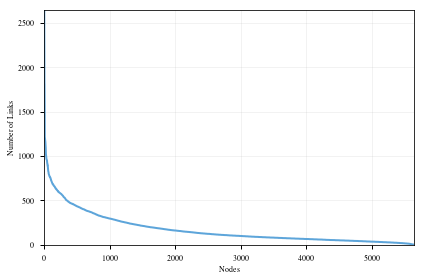

In [33]:
plt.plot([x[1] for x in y_sorted])
plt.xlabel("Nodes")
plt.ylabel("Number of Links")

In [34]:
plt.savefig("test1.png")
plt.show()

/Users/kk3671/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


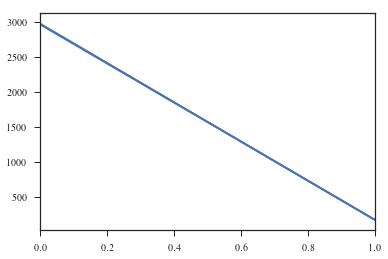

In [15]:
from numba import jit
from sklearn.metrics.pairwise import cosine_similarity
import pickle
import numpy as np

In [48]:
embeddings_file = open("./output/ecoli/embeddings_0.2_0.2_0.pkl", 'rb')
embeddings = pickle.load(embeddings_file)
embeddings_file.close()

In [49]:
cosine = cosine_similarity(embeddings, embeddings)
cosine = cosine - np.diag(np.diag(cosine))
cosine

array([[ 0.        ,  0.17460428, -0.01261921, ..., -0.14728354,
         0.10173468,  0.16915253],
       [ 0.17460428,  0.        , -0.07161118, ...,  0.0284634 ,
         0.10750478, -0.05759257],
       [-0.01261921, -0.07161118,  0.        , ...,  0.27022979,
         0.28921398,  0.11626659],
       ..., 
       [-0.14728354,  0.0284634 ,  0.27022979, ...,  0.        ,
         0.11709637,  0.0059796 ],
       [ 0.10173468,  0.10750478,  0.28921398, ...,  0.11709637,
         0.        ,  0.12578636],
       [ 0.16915253, -0.05759257,  0.11626659, ...,  0.0059796 ,
         0.12578636,  0.        ]])

In [50]:
import networkx as nx
import pandas as pd

In [51]:
from utils import *
cosine = np.tril(cosine)

In [52]:
cosine_edgelist = convertAdjMatrixToSortedRankTSV(cosine)

In [53]:
cosine_edgelist.shape

(20344610, 3)

In [56]:
new_edgelist = cosine_edgelist[cosine_edgelist.iloc[:,2]>0.33]

In [57]:
new_edgelist.shape

(146393, 3)

In [58]:
new_edgelist.columns = [0,1,2]
new_edgelist.to_csv("ecoli_predicted_G_edgelist.txt", header=False, index=False, sep=",")

In [23]:
pred_G=nx.read_edgelist("ecoli_predicted_G_edgelist.txt", nodetype=int, data=(('weight',float),), delimiter=',')

In [24]:
pred_G_yeast=nx.read_edgelist("predicted_G_edgelist.txt", nodetype=int, data=(('weight',float),), delimiter=',')

In [25]:
edge_degree = pred_G_yeast.degree()

In [29]:
len([i for i in orig_G_yeast.nodes])

5638

In [30]:
len([i for i in pred_G_yeast.nodes])

3435

In [28]:
y_sorted_pred_yeast = sorted(pred_G_yeast.degree(),key=itemgetter(1),reverse=True)
y_sorted_pred_yeast

[(2568, 1867),
 (3407, 1831),
 (5372, 1813),
 (5053, 1808),
 (5124, 1780),
 (3871, 1779),
 (5598, 1765),
 (752, 1749),
 (2082, 1747),
 (5396, 1744),
 (3740, 1743),
 (5236, 1736),
 (5101, 1721),
 (5684, 1720),
 (3335, 1714),
 (5509, 1707),
 (4289, 1694),
 (3035, 1686),
 (5800, 1685),
 (5226, 1681),
 (4163, 1677),
 (5073, 1671),
 (4016, 1660),
 (5428, 1658),
 (5391, 1655),
 (4491, 1652),
 (4794, 1649),
 (5780, 1648),
 (3524, 1638),
 (5281, 1635),
 (2238, 1629),
 (3665, 1627),
 (5877, 1627),
 (3057, 1626),
 (1591, 1625),
 (2550, 1622),
 (4337, 1619),
 (5433, 1618),
 (3114, 1618),
 (4755, 1612),
 (5288, 1608),
 (2795, 1607),
 (1829, 1604),
 (4961, 1601),
 (3882, 1587),
 (1615, 1585),
 (289, 1584),
 (3839, 1583),
 (4470, 1581),
 (4523, 1580),
 (2171, 1575),
 (3254, 1574),
 (1727, 1563),
 (1808, 1561),
 (3633, 1559),
 (1543, 1557),
 (5686, 1557),
 (5062, 1552),
 (1161, 1551),
 (2528, 1551),
 (5527, 1539),
 (4960, 1539),
 (5888, 1527),
 (2769, 1526),
 (3628, 1525),
 (1000, 1523),
 (803, 1522)

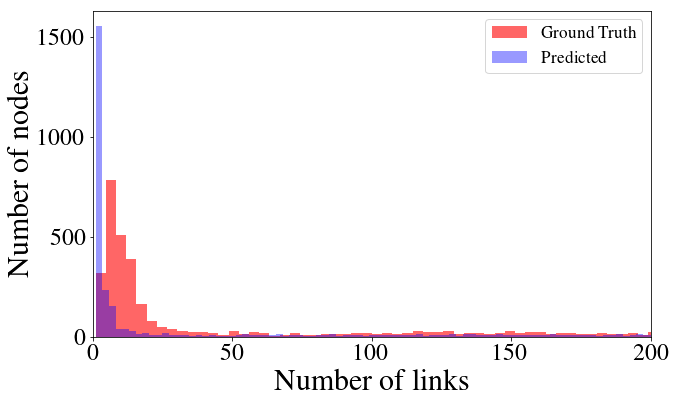

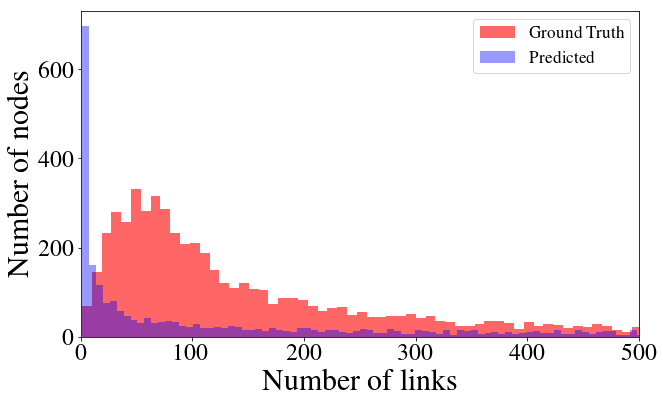

In [43]:
import matplotlib
import matplotlib.pyplot as plt

data1 = [i
    [1]  for i in y_sorted_pred]
data2 = [i[1]  for i in y_sorted_orig]
# Two subplots, unpack the axes array immediately
fig, (ax1) = plt.subplots()
fig.set_tight_layout(False)
fig.set_size_inches(10, 6)


ax1.hist(data2, 300, alpha=0.6, label="Ground Truth", color="red")
ax1.hist(data1, 300, alpha=0.4, label="Predicted",color="blue")

# ax.set_title(r"Degree distribution of yeast's genetic interaction network", y=1.05)
ax1.set_ylabel(r"Number of nodes", fontsize=30)
ax1.set_xlabel("Number of links", fontsize=30)
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')
ax1.set_xlim(0, 200)
ax1.legend(fontsize = 'xx-large')
plt.savefig('degree_ecoli.pdf', dpi =1200)

data1 = [i
    [1]  for i in y_sorted_pred_yeast]
data2 = [i[1]  for i in y_sorted_orig_yeast]
fig, (ax2) = plt.subplots()
fig.set_tight_layout(False)
fig.set_size_inches(10, 6)
ax2.hist(data2, 300, alpha=0.6, label="Ground Truth", color="red")
ax2.hist(data1, 300, alpha=0.4, label="Predicted",color="blue")

# ax.set_title(r"Degree distribution of yeast's genetic interaction network", y=1.05)
ax2.set_ylabel(r"Number of nodes", fontsize=30)
ax2.set_xlabel("Number of links", fontsize=30)
ax2.yaxis.set_ticks_position('left')
ax2.xaxis.set_ticks_position('bottom')
ax2.set_xlim(0, 500)
ax2.legend(fontsize = 'xx-large')
plt.savefig('degree_yeast.pdf', dpi =1200)
plt.show()

In [106]:
data =  [i[1]  for i in y_sorted]
zeros = np.zeros([5950- len(y_sorted), 1])
data = np.append(data, zeros)
data = data.astype(int)

In [107]:
unique_elements, counts_elements = np.unique(data, return_counts=True)

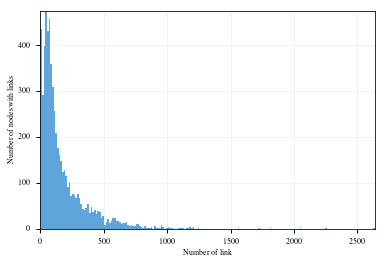

In [134]:
import matplotlib
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
fig.set_tight_layout(False)
bar = plt.hist( data, 200)

ax.set_ylabel(r"Number of nodes with links")
ax.set_xlabel("Number of link")
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.savefig('test.pdf', bbox_inches='tight', dpi =300)
plt.show()

In [131]:
np.savetxt("test.txt", data.astype(int), delimiter=",")

In [51]:
exp_data = pd.read_csv("./data/yeast/net4_expression_data.tsv", header=0, sep="\t", index_col=None).T

In [147]:
exp_data.shape

(5950, 536)

In [12]:
yeast_corr_exp = exp_data.T.corr()

In [34]:
def correlation_matrix(df_corr, fig_name):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    fig.set_size_inches(18.5, 10.5)
    ax = fig.add_subplot(111)
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    cax = ax.matshow(df_corr, interpolation="nearest", cmap = cmap)
    ax.grid(True)
    ax.set_ylabel(r"Genes", fontsize=30)
    ax.set_xlabel("Genes", fontsize=30)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
#     plt.title('Expression Data Correlation')
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[-1, -0.75,-0.5,-0.25,0, 0.25, 0.5, 0.75,1])
    plt.savefig(fig_name, dpi =300)
    plt.show()

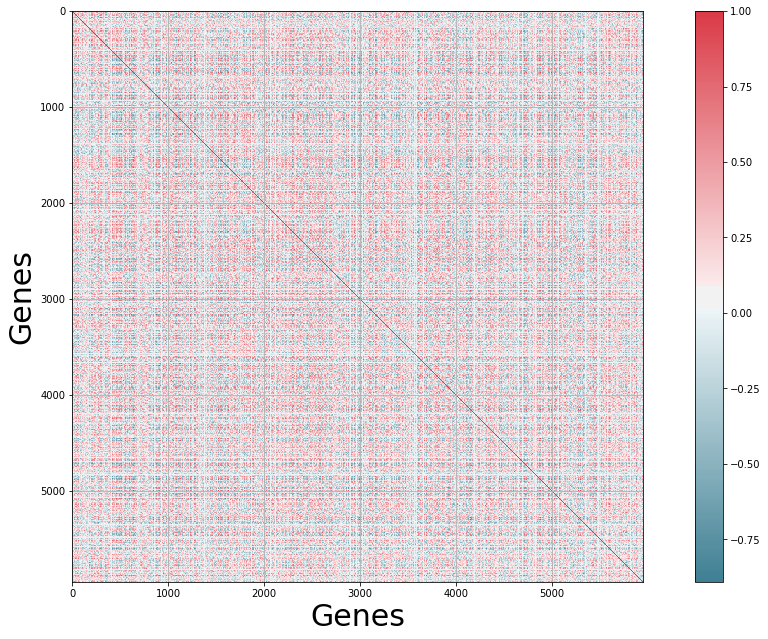

In [39]:
correlation_matrix(yeast_corr_exp, 'yeast_corr.png')

In [127]:
from scipy.spatial.distance import pdist, squareform

In [15]:
import pickle

In [17]:
file = open('./output/corr_yeast.pkl','wb')
pickle.dump(yeast_corr_exp, file)
file.close()

In [53]:
exp_data.shape

(5950, 536)

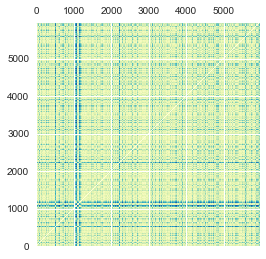

In [137]:
data_dist = pdist(exp_data) # computing the distance
D = squareform(data_dist)
plt.matshow(D, aspect='auto', origin='lower', cmap=plt.cm.YlGnBu)
plt.show()

In [ ]:
data = yeast_corr_exp

# Ecoli

In [7]:
G_ecoli=nx.read_edgelist("./data/ecoli/edgelist_biogrid.txt", nodetype=int, data=(('weight',float),), delimiter=' ')

In [8]:
y_sorted_ecoli = sorted(G_ecoli.degree(),key=itemgetter(1),reverse=True)

In [6]:
data =  [i[1]  for i in y_sorted_ecoli]
zeros = np.zeros([4511- len(y_sorted_ecoli), 1])
data = np.append(data, zeros)
data = data.astype(int)

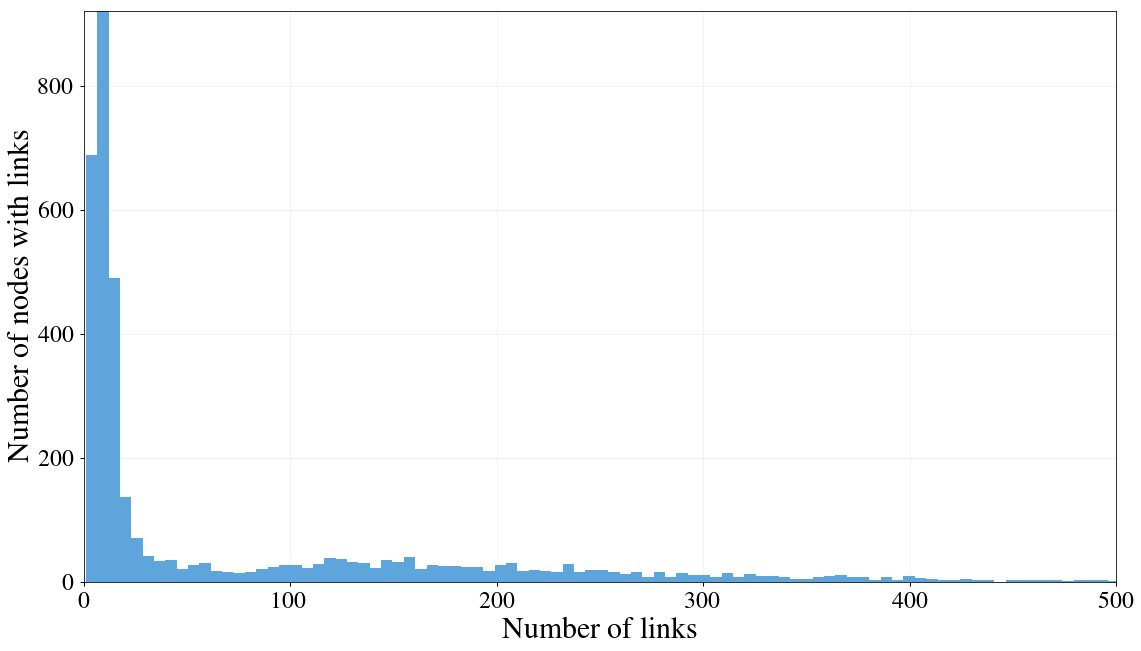

In [181]:
import matplotlib
import matplotlib.pyplot as plt

data = [i
    [1]  for i in y_sorted_ecoli]

fig, ax = plt.subplots()
fig.set_tight_layout(False)
fig.set_size_inches(18.5, 10.5)
bar = plt.hist(data, 200, alpha=1)
# ax.set_title(r"Degree distribution of yeast's genetic interaction network", y=1.05)
ax.set_ylabel(r"Number of nodes with links", fontsize=30)
ax.set_xlabel("Number of links", fontsize=30)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_xlim(0, 500)
plt.savefig('ecoli.png', dpi =300)
plt.show()

In [11]:
import pandas as pd

In [12]:
exp_data_ecoli = pd.read_csv("./data/ecoli/data_standard.txt", header=None, sep=" ", index_col=0)

In [13]:
exp_data_ecoli.shape

(4511, 805)

In [14]:
ecoli_corr_exp = exp_data_ecoli.T.corr()

In [ ]:
ecoli_corr_exp.shape

In [ ]:
file = open('./output/corr_ecoli.pkl','wb')
pickle.dump(yeast_corr_exp, file)
file.close()

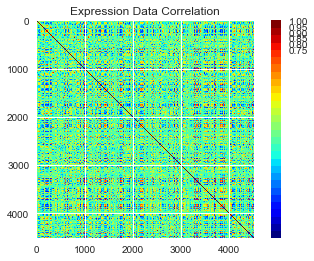

In [148]:
correlation_matrix(ecoli_corr_exp)

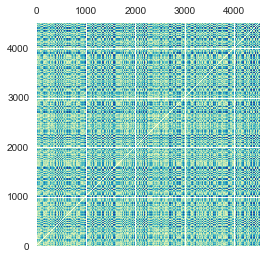

In [157]:
data_dist = pdist(ecoli_corr_exp) # computing the distance
D = squareform(data_dist)
plt.matshow(D, aspect='auto', origin='lower', cmap=plt.cm.YlGnBu)
plt.show()

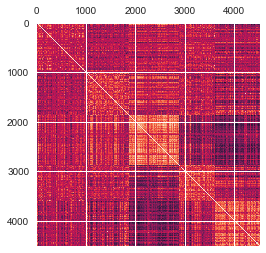

In [199]:
data = np.array(ecoli_corr_exp)
model = SpectralCoclustering(n_clusters=5, random_state=0)
model.fit(np.array(exp_data_ecoli))

fit_data = data[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.row_labels_)]
plt.matshow(fit_data)
plt.show()

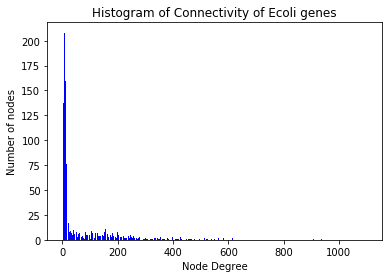

In [25]:
import collections
import matplotlib.pyplot as plt
import networkx as nx


G = G_ecoli
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Histogram of Connectivity of Ecoli genes")
plt.ylabel("Number of nodes")
plt.xlabel("Node Degree")
plt.show()


In [6]:
import math

In [12]:
log_degree = [math.log10(i) for i in deg]
log_count = [math.log10(i) for i in cnt]

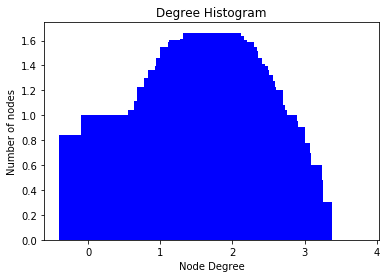

In [14]:

fig, ax = plt.subplots()
plt.bar(log_degree, log_count, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Number of nodes")
plt.xlabel("Node Degree")
plt.show()


In [6]:
nx.draw_circular(G_ecoli)

In [263]:
g1 = exp_data.iloc[1073,:]

In [264]:
g2 = exp_data.iloc[0,:]

In [265]:
np.corrcoef(g1,g2)

array([[ 1.        ,  0.45492624],
       [ 0.45492624,  1.        ]])

In [266]:
np.max(yeast_corr_exp_missing))

0.95572819538057729

In [268]:
from numpy import unravel_index

In [270]:
unravel_index(np.array(yeast_corr_exp_missing).argmax(), yeast_corr_exp_missing.shape)

(249, 3523)

In [271]:
missing_nodes[249]

404

In [272]:
g1 = exp_data.iloc[404,:]
g2 = exp_data.iloc[3523,:]
np.corrcoef(g1,g2)

array([[ 1.       ,  0.9557282],
       [ 0.9557282,  1.       ]])

In [273]:
genes.iloc[404,:]

I#ID         G405
Name    YFR012W-A
Name: 404, dtype: object

In [275]:
genes.iloc[3523,:]

I#ID      G3524
Name    YFR012W
Name: 3523, dtype: object

/Users/kk3671/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


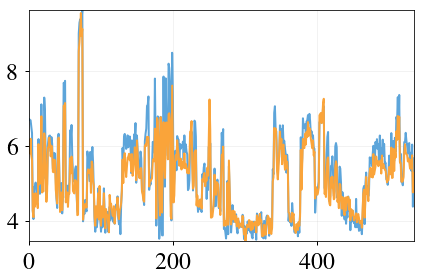

In [278]:
plt.plot(g1)
plt.plot(g2)

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

# Two subplots, unpack the axes array immediately
fig, ax = plt.subplots()
fig.set_tight_layout(False)
fig.set_size_inches(20, 6)
ax.plot(g1)
ax.plot(g2)

# ax.set_title(r"Degree distribution of yeast's genetic interaction network", y=1.05)
ax1.set_ylabel(r"Number of nodes", fontsize=30)
ax1.set_title("Yeast")
ax2.set_xlabel("Number of links", fontsize=30)
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')
plt.savefig('expression.png', dpi =300)
plt.show()

/Users/kk3671/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/Users/kk3671/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


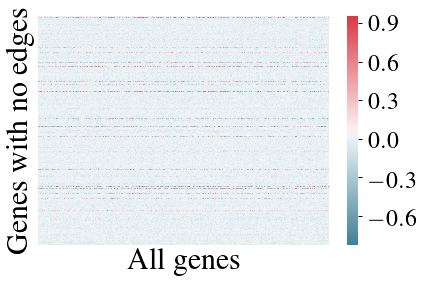

In [297]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns_plot = sns.heatmap(yeast_corr_exp_missing, cmap=cmap, xticklabels="", yticklabels="")
sns_plot.set_xlabel("All genes")
sns_plot.set_ylabel("Genes with no edges")
fig = sns_plot.get_figure()

fig.savefig("corr.png")


In [11]:
nodes = [ i for i in G_ecoli.nodes]
total_nodes = [ i for i in range(0, 4511)]

In [12]:
missing_nodes = list(set(total_nodes) - set(nodes))

In [13]:
len(missing_nodes)

823

In [40]:
genes = pd.read_csv("./data/ecoli/net3_gene_ids.tsv", sep="\t")


In [38]:
ecoli_corr_exp = exp_data_ecoli.T.corr()

In [15]:
ecoli_corr_exp = ecoli_corr_exp - np.identity(ecoli_corr_exp.shape[0])
ecoli_corr_exp_missing = ecoli_corr_exp.iloc[missing_nodes,:]

In [13]:
# fig.set_size_inches(20, 6)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns_plot = sns.heatmap(yeast_corr_exp, cmap=cmap, xticklabels="", yticklabels="")
# sns_plot.set_xlabel("All genes")
# sns_plot.set_ylabel("Genes with no edges")
# fig = sns_plot.get_figure()
# fig.savefig("ecoli_corr.png")

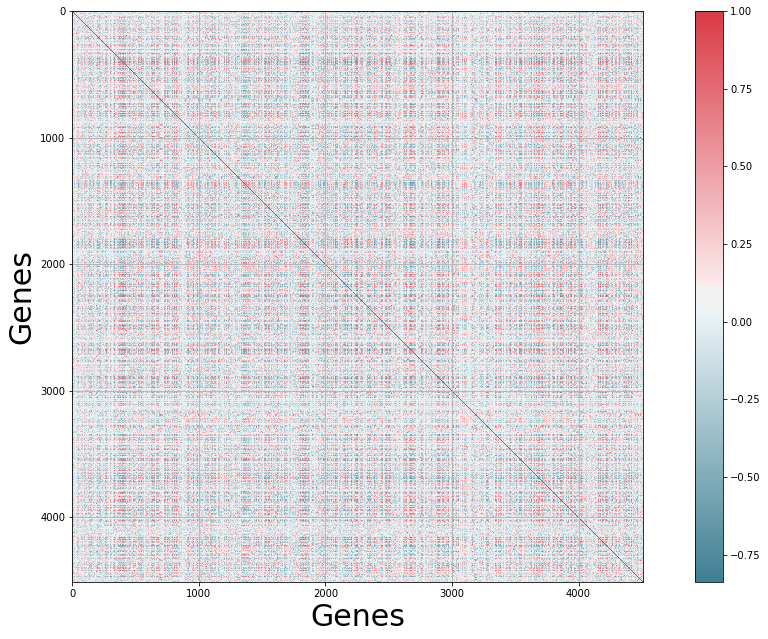

In [41]:
correlation_matrix(ecoli_corr_exp, 'ecoli_corr.png')

In [55]:
def correlation_matrix(df_corr_1, df_corr_2, fig_name):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_tight_layout(False)
    fig.set_size_inches(20, 10)
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    cax = ax1.matshow(df_corr_1, interpolation="none", cmap = cmap)
    ax1.grid(True)
    ax1.set_ylabel(r"Genes", fontsize=30)
    ax1.set_xlabel("Genes", fontsize=30)
    ax1.yaxis.set_ticks_position('left')
    ax1.xaxis.set_ticks_position('bottom')
    cax2 = ax2.matshow(df_corr_2, interpolation="none", cmap = cmap)
    ax1.set_title("Yeast", fontsize=30)
    ax2.grid(True)
    ax2.set_ylabel(r"Genes", fontsize=30)
    ax2.set_xlabel("Genes", fontsize=30)
    ax2.yaxis.set_ticks_position('left')
    ax2.xaxis.set_ticks_position('bottom')
    ax2.set_title("Ecoli", fontsize=30)
    fig.colorbar(cax2, ticks=[-1, -0.75,-0.5,-0.25,0, 0.25, 0.5, 0.75,1])
    plt.savefig(fig_name, dpi =300)
    plt.show()

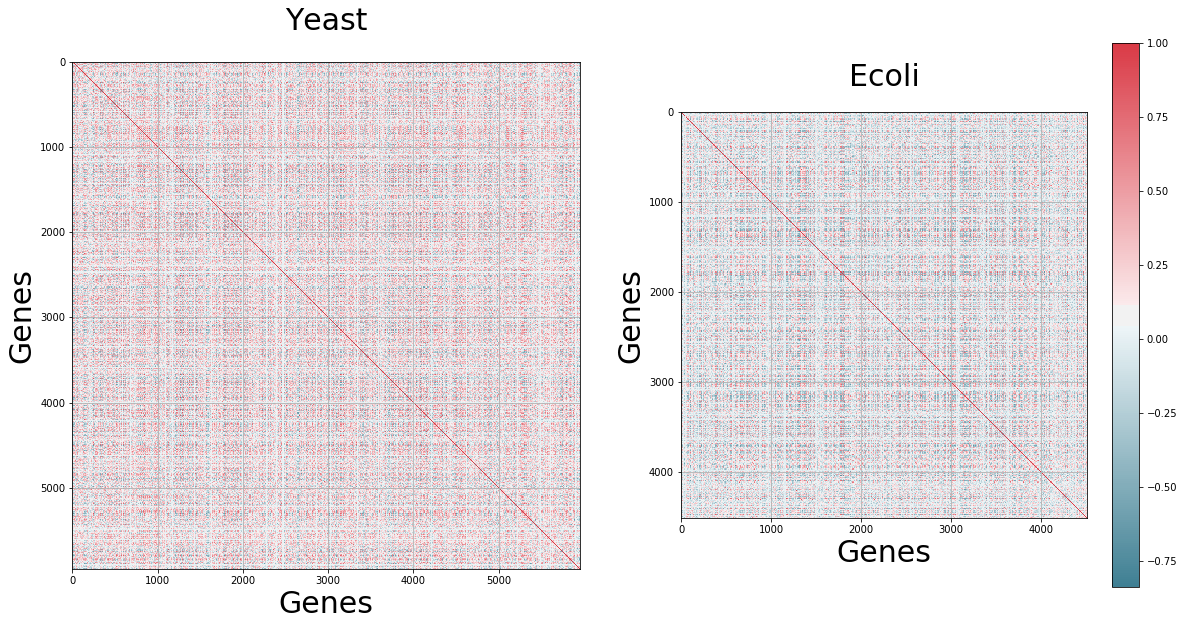

In [56]:
correlation_matrix(yeast_corr_exp, ecoli_corr_exp, "corr_plot.png")

In [1]:
[n for n in G.neighbors(5124)]

NameError: name 'G' is not defined

In [26]:
import scipy.io as sio
mi_yeast = sio.loadmat('mi_yeast.mat')


In [30]:
mi = mi_yeast['mi']

In [31]:
mi.shape

(5950, 5950)